# Estructurando proyecto DS
## Actividad 3 y Actividad 4  
### Actividad 3
    1. Generar preguntas de interés o hipótesis de interés sobre el dataset elegido para el proyecto final.
    2. Crear visualizaciones (univariados, bivariados o trivariados) junto con resúmenes numéricos básicos acordes con los tipos de variables disponibles.
    3. Interpretar los resultados obtenidos
### Actividad 4
    1. Abstracto con motivación y audiencia
    2. Preguntas/Hipótesis que queremos resolver mediante el análisis de datos
    3. Análisis Exploratorio de Datos (EDA)
    4. Con base en las visualizaciones y resúmenes numéricos generados del desafío anterior dar recomendaciones basados en los insights observados.
    5. Para esta oportunidad se deberán tener avances en los apartados: Definición de objetivo, Contexto comercial, Problema Comercial, Contexto analítico, Exploración de datos (EDA)

# Desarrollo

## Definición de Objetivo 
El análisis exploratorio de datos es necesario para cualquier proceso de análisis de datos a la hora de leer e interpretar la información entregada. Resulta imperativo no solo saber distribuir los datos, sino interpretarlos creando relaciones entre sí que a simple vista no es posible visualizar, esto expande la información que puede ser extraída y permite un campo de trabajo con los datos más extenso del esperado. Se va a presentar un caso de caracter práctica con el fin de demostrar el alcance de una adecuada exploración de datos para tomar las mejores decisiones de acuerdo a un banco de datos en bruto. Se explorará un caso imaginario basado en datos reales suministrados por internet y usando tecnologías asociadas a la estadística en el entorno de trabajo ofrecido por Python.

## Contexto Comercial
Usted se encuentra trabajando en el departamento de marketing, en el equipo de analistas, de una empresa que ofrece como actividad comercial principal una plataforma para la visualización de anime. Debido a una disminución de tráfico en la plataforma, los directivos han decidido contratar especialistas para solventar esta crisis. Recientemente, el departamento de diseño ha decidido hacer una reconstrucción visual completa para atraer a las nuevas generaciones y el nuevo jefe del departamento le ha pedido al departamento de marketing un análisis detallado del contenido de la plataforma y su relación con el usuario final. 
El jefe solicitó la viabilidad a partir del puntaje de cada anime lo siguiente: 
- Colocar en la primera linea una exposición por género, productor y estudio. 
- Colocar en la segunda linea lo más atrayente para el usuario final basado en duración, fuente, tipo y compromiso para llegar al final.

## Problema Comercial
Su tarea principal es explorar los datos, identificar la mejor relación entre el score final y las variables de género, productor, estudio, duración, fuente, tipo y compromiso para llegar al final, para luego presentar la mejor propuesta para la exposición de dichas categorías en la primera y segunda linea de la plataforma.

## Contexto Analítico 
Usando un conjunto de datos relativamente reciente, te dispones a iniciar el proceso de análisis. Debido a que recibiste ordenes directas del jefe de departamento, te encuentras limitado a solo lo que solicitó. Tu jefe directo te pide que seas lo más profesional posible y hagas un análisis serio, lo que te da cierta libertad. 

El conjunto de datos a trabajar contiene datos estructurados muy generales. Te dispones a realizarlo de la siguiente manera:  
  
Para la primera linea.  
Se va a sacar el promedio de puntaje por variable categórica. Se va a tomar el score del anime y se va a aplicar como valor para cada variable categórica que contenga dicho ánime. Una vez hecho esto, se va a analizar el comportamiento que tiene el puntaje en relación a la variable categórica asociada.   
Esto se va a realizar de la misma forma para género (genre), productores (producers) y estudios (studios).  
  
Para la segunda linea.  
Para interpretar correctamente la relación de duración, se va a evaluar la relación que existe entre:  
- score y la duración  
- score y el número de episodios  
- duración y número de episodios  
Para interpretar correctamente la relación de compromiso para finalizar, se va a evaluar la relación que existe entre:   
- duración vs on-hold (1)  
- duración vs dropped (2)   
- cantidad de episodios vs on-hold (3)  
- cantidad de episodios vs dropped (4)  
- (1) vs (3) <- Esto se puede volver multivariado para evitar gráficas. Boxplot(Ashley)  
- (2) vs (4) <- Esto se puede volver multivariado para evitar gráficas. Boxplot(Ashley)  
- duración vs completed  
- cantidad de episodios vs completed  
- (5) vs (6) <- Esto se puede volver multivariado para evitar gráficas. Boxplot(Ashley)  
(Quitable)  
Para interpretar correctamente la relación de fuente se va a evaluar la relación que existe entre fuente vs score  
Para interpretar correctamente la relación de tipose va a evaluar la relación que existe entre tipo vs score

## Exploración de Datos

In [19]:
#Inicialización
import os
import pandas as pd
import matplotlib as m
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl

#Lectura del archivo y confirmación de contenido

tabla=pd.read_csv('anime.csv',sep=',',encoding='utf-8')
tabla.head(5)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


### Primera linea

Proceso a seguir:
- Tomar el score del anime y se va a aplicar como valor para cada variable categórica que contenga dicho ánime.  
- Analizar el comportamiento de la calificación según la variable categórica específica.   

Esto se va a realizar de la misma forma para género (genre), productores (producers) y estudios (studios). Se escogerá el que mayor score contenga.

In [2]:
#Extrayendo las columnas que nos interesan
tablaPrimeraLinea = tabla[['Score','Genres','Producers','Studios']].copy()
tablaPrimeraLinea

,Score,Genres,Producers,Studios
0,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Bandai Visual,Sunrise
1,8.39,"Action, Drama, Mystery, Sci-Fi, Space","Sunrise, Bandai Visual",Bones
2,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Victor Entertainment,Madhouse
3,7.27,"Action, Mystery, Police, Supernatural, Drama, ...","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",Sunrise
4,6.98,"Adventure, Fantasy, Shounen, Supernatural","TV Tokyo, Dentsu",Toei Animation
...,...,...,...,...
17557,Unknown,"Adventure, Mystery, Supernatural",Unknown,Unknown
17558,Unknown,"Comedy, Horror, Supernatural",Kadokawa,Passione
17559,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Unknown,Unknown
17560,Unknown,"Adventure, Slice of Life, Comedy",Kadokawa,8bit


In [54]:
#Limpieza de datos
#Se trabajará con dataframe para almacenar los datos de interés para las tres categorías
genredf = pd.DataFrame(columns=['Genre', 'Score'])
producerdf = pd.DataFrame(columns=['Producer', 'Score'])
studiodf = pd.DataFrame(columns=['Studio', 'Score'])

#Para cada uno de los registros
for i in range(len(tablaPrimeraLinea)):
#for i in range(10):
    #Temporales para mejor compresion
    studioI=tablaPrimeraLinea['Studios'][i] #Estudios del registro
    generoI=tablaPrimeraLinea['Genres'][i] #Generos del registro
    productorI = tablaPrimeraLinea['Producers'][i] #Productores del registro
    scoreI=tablaPrimeraLinea['Score'][i] #Score del registro
    
    #Productores
    #Deconstruimos si es necesario entre los que se encuentren
    prodTemp = productorI.split(",")
    for j in range(len(prodTemp)): prodTemp[j]=prodTemp[j].strip() #Se eliminan vacios

    for prod in prodTemp: #Por cada productor del registro
        if scoreI != 'Unknown' and prod != 'Unknown': #Si hay desconocidos o vacios, los descartamos porque no podemos trabajar con esa información. 
            producerdf = pd.concat([producerdf, pd.DataFrame([{'Producer' : prod , 'Score' : float(scoreI)}])], ignore_index=True)

    #Genero
    #Deconstruimos si es necesario entre los que se encuentren
    genTemp = generoI.split(",")
    for j in range(len(genTemp)): genTemp[j]=genTemp[j].strip() #Se eliminan vacios

    for gen in genTemp: #Por cada productor del registro
        if scoreI != 'Unknown' and gen != 'Unknown': #Si hay desconocidos o vacios, los descartamos porque no podemos trabajar con esa información. 
            genredf = pd.concat([genredf, pd.DataFrame([{'Genre' : gen , 'Score' : float(scoreI)}])], ignore_index=True)

    #Estudios
    #Deconstruimos si es necesario entre los que se encuentren
    stuTemp = studioI.split(",")
    for j in range(len(stuTemp)): stuTemp[j]=stuTemp[j].strip() #Se eliminan vacios

    for stu in stuTemp: #Por cada productor del registro
        if scoreI != 'Unknown' and stu != 'Unknown': #Si hay desconocidos o vacios, los descartamos porque no podemos trabajar con esa información. 
            studiodf = pd.concat([studiodf, pd.DataFrame([{'Studio' : stu , 'Score' : float(scoreI)}])], ignore_index=True)

C:\Users\geral\AppData\Local\Temp\ipykernel_8344\3430473936.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  producerdf = pd.concat([producerdf, pd.DataFrame([{'Producer' : prod , 'Score' : float(scoreI)}])], ignore_index=True)
C:\Users\geral\AppData\Local\Temp\ipykernel_8344\3430473936.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  genredf = pd.concat([genredf, pd.DataFrame([{'Genre' : gen , 'Score' : float(scoreI)}])], ignore_index=True)
C:\Users\geral\AppData\Local\Temp\ipykernel_83

Se hizo una limpieza de datos donde se despreciaron los datos desconocidos ya que no será posible trabajar con ellos.  
Una vez hecha la limpieza y adecuación de dataframe, vamos a visualizar la información. 

#### Productores

In [95]:
len(producerdf['Producer'].unique())

1208

Hay 1208 productores.  
No será posible hacer una comparativa de todos, así que solo se va a hacer una comparativa de aquellos 30 con mayores puntajes para tomar una decisión. 

<Axes: xlabel='Producer'>

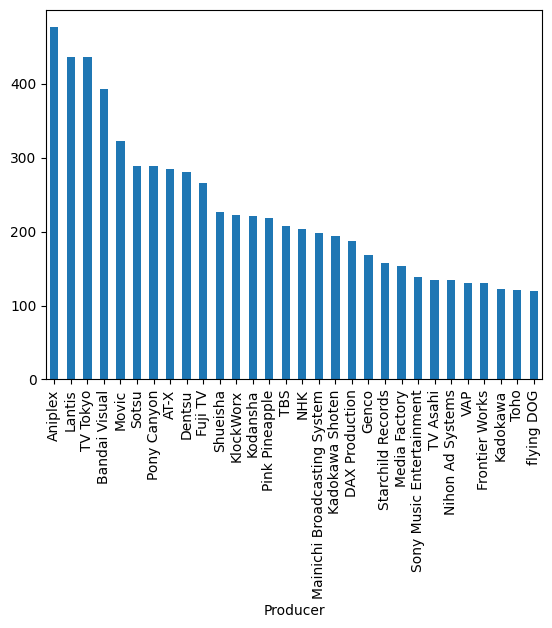

In [98]:
producerdf["Producer"].value_counts()[0:30].plot(kind='bar')

En relación a los productores, se puede visualizar a primera vista que hay una inclinación marcada a los primeros 5 productores y luego los siguientes 5. No hay tanta variabilidad. A simple vista, se podría decir que colocar a los 5 productores mejor calificados sería adecuado para captar la atención, pero esto también podría generar que muchos usuarios descarten la primera linea por ver a productores tan conocidos sin tener en cuenta otros detalles.  
No es concluyente. 


#### Géneros


In [96]:
len(genredf['Genre'].unique())

43

Hay 43 productores.  
No será posible hacer una comparativa de todos, así que solo se va a hacer una comparativa de aquellos 30 con mayores puntajes para tomar una decisión. 

<Axes: xlabel='Genre'>

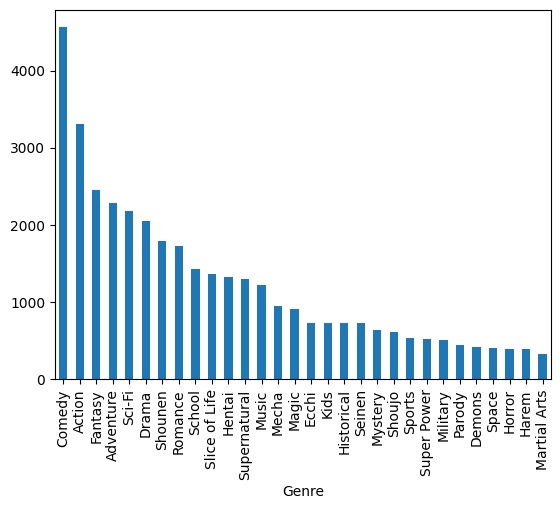

In [55]:
genredf["Genre"].value_counts()[0:30].plot(kind='bar')

En relación a los géneros, se puede visualizar una clara inclinación hacia los géneros de comedia (Comedy) y acción (Action). Si se colocan únicamente estos dos géneros en la primera linea, contrario a captar mejor la atención, va a monopolizar la sección y podría llegar a ser menos considerado a la hora de tomar una decisión para ver anime.   
Lo más adecuado sería tomar los animes con mejores calificaciones que hagan parte de los siguientes 10 géneros mejor calificados, pero que incluyan los géneros de comedia (Comedy) y acción (Action) entre sus subgéneros. Sin embargo, no hay forma de asegurar la viabilidad de esto. 

#### Estudios

In [97]:
len(studiodf['Studio'].unique())

624

Hay 624 estudios.  
No será posible hacer una comparativa de todos, así que solo se va a hacer una comparativa de aquellos 30 con mayores puntajes para tomar una decisión. 

<Axes: xlabel='Studio'>

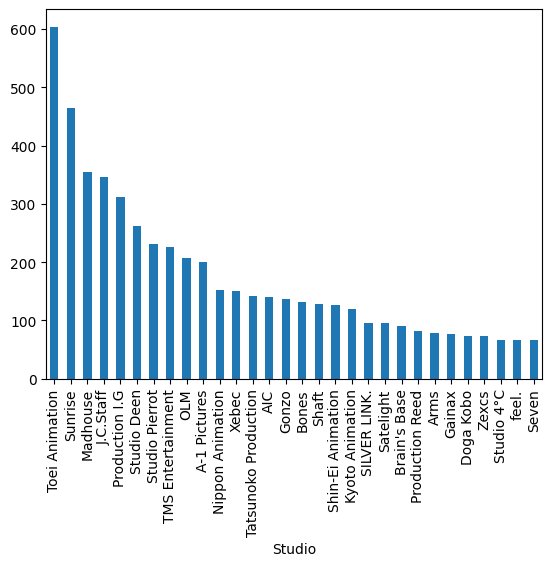

In [56]:
studiodf["Studio"].value_counts()[0:30].plot(kind='bar')

En relación a los estudios, tiene un comportamiento similar al de los géneros. De la misma forma, ver el mismo estudio podría desmotivar al usuario de escoger un anime a ver. Es probable que el usuario ya conozca de antemano el estudio y sus productos, lo que dificultaría su labor de encontrar algo distinto que ver. Sin embargo, no hay información que respalde esta teoria. 


**Conclusión:** Ha sido posible visualizar aquello que es más agradable para una mejor calificación en cuanto a estudios, productores y estudios, pero son datos superficiales. La conclusión a la que podemos llegar es que no es posible tomar una decisión a partir de la información presentada aquí, se necesita mayor detalle en cuanto al comportamiento de los usuarios más allá de los puntajes. 

### Segunda Linea

Para interpretar correctamente la relación de duración, se va a evaluar la relación que existe entre:  
- score y la duración  
- score y el número de episodios  
- duración y número de episodios  
Para interpretar correctamente la relación de compromiso para finalizar, se va a evaluar la relación que existe entre:   
- duración vs on-hold (1)  
- duración vs dropped (2)   
- cantidad de episodios vs on-hold (3)  
- cantidad de episodios vs dropped (4)  
- (1) vs (3) <- Esto se puede volver multivariado para evitar gráficas. Boxplot(Ashley)  
- (2) vs (4) <- Esto se puede volver multivariado para evitar gráficas. Boxplot(Ashley)  
- duración vs completed  
- cantidad de episodios vs completed  
- (5) vs (6) <- Esto se puede volver multivariado para evitar gráficas. Boxplot(Ashley)  
(Quitable)  
Para interpretar correctamente la relación de fuente se va a evaluar la relación que existe entre fuente vs score  
Para interpretar correctamente la relación de tipose va a evaluar la relación que existe entre tipo vs score

In [101]:
#Extrayendo las columnas que nos interesan
tablaSegundaLinea = tabla[['Score','Duration','Episodes','On-Hold','Dropped','Completed']].copy()
tablaSegundaLinea

,Score,Duration,Episodes,On-Hold,Dropped,Completed
0,8.78,24 min. per ep.,26,71513,26678,718161
1,8.39,1 hr. 55 min.,1,1935,770,208333
2,8.24,24 min. per ep.,26,25465,13925,343492
3,7.27,25 min. per ep.,26,5121,5378,46165
4,6.98,23 min. per ep.,52,766,1108,7314
...,...,...,...,...,...,...
17557,Unknown,Unknown,Unknown,0,0,0
17558,Unknown,Unknown,Unknown,14,0,0
17559,Unknown,Unknown,Unknown,0,0,0
17560,Unknown,Unknown,Unknown,2,1,2


In [ ]:
#Limpieza de datos


In [ ]:
#sns.boxplot(data=dfProducer, x="promedio", y="Productor")

# Creacion de un dataframe vacio
df= pd.DataFrame(columns=['Producer', 'Score'])
df

df = pd.concat([df, pd.DataFrame([{'Producer' : 'Alv' , 'Score' : '8.7'}])], ignore_index=True)
df

Weno, ya al menos avancé un poquito, me falta la segunda parte. Voy a poner las clases de fondo más seguido. 